# Using Scipy Curve Fitting to Compare ICU Beds and US Population By County

## Getting the Data 

__Step 1:__ First, we can import the various libraries and packages necessary extracting the data and analyzing it. 

In [14]:
import scipy
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__Step 2:__ The data was collected from the *Kaggle* Data Science website. We can download this data and save it on our computer. To obtain the data, we can use *.read_csv* and input the path of where we saved the data on our machine. An *r* was added before the path due to an error occuring because of the use of a normal string as a path. 

In [15]:
icudata = pd.read_csv(r"C:\Users\guptaj\Documents\ICUdata.csv")

We can also view the data by using the *print()* function! This will get us the column names and the general format of the data. 

In [16]:
print(icudata)

        State      County  ICU Beds  Total Population  Population Aged 60+  \
0     Alabama     Autauga         6             55036                10523   
1     Alabama     Baldwin        51            203360                53519   
2     Alabama     Barbour         5             26201                 6150   
3     Alabama        Bibb         0             22580                 4773   
4     Alabama      Blount         6             57667                13600   
...       ...         ...       ...               ...                  ...   
3137  Wyoming  Sweetwater        10             44527                 7015   
3138  Wyoming       Teton         6             22923                 4298   
3139  Wyoming       Uinta         6             20758                 3554   
3140  Wyoming    Washakie         0              8253                 2206   
3141  Wyoming      Weston         0              7117                 2073   

      Percent of Population Aged 60+  Residents Aged 60+ Per Ea

__Step 3:__ Now, we can work on getting the data we need. In order to compare ICU Beds and Population, we can compare the columns *ICU Beds* and *Total Population* and see if as the population in a county increases, the number of ICU beds in hospitals in that county increase. We can save those column's data into the variables *x* and *y* to work with it easier. 

In [17]:
y = icudata['ICU Beds']
x = icudata['Total Population']

## Generating a Best Fit Line 

__Step 4:__ Next, in order to develop a best fit function to describe the relationship between the number of ICU beds and population based on data we can create a function. In this case, a linear graph will best fit the data. So, we can make a function *model* that has parameters m, x, and b. 

In [18]:
def model(m,x,b):
    return m*x + b

__Step 5:__ We can now use *popt* and curve fit to find the parameter values in the function *model.* In this data, the *m* and the *b* values are the parameters we are trying to find. *x* is not a parameter but rather the data the parameters mathematically manipulate to get the best fit line. This best fit line, ideally, matches quite well with the actual data collected for the number of ICU Beds that is stored in the variable *y.* 

In [19]:
popt, pcov = curve_fit(model, icudata['Total Population'], icudata['ICU Beds'])

If we print *popt,* we will get the parameter values in an array that the curve fit will use for the function *model* to construct a best-fit line. 

In [20]:
print(popt)

[ 0.00023479 -0.18548888]


## Plotting 

__Step 6:__ Now we can plot our collected data from the dataframe *icudata*, which is shown in purple. We want to create a scatter plot of the collected data so we can use *plt.scatter.* In order to construct out bestfit line, we need to create a numeric sequence of the number of point we want to apply the best fit line equation to using *np.linspace.* Since the highest population we have is 1 x 10^7 , we should create that sequence to go up to 1 x 10^7 and starting from 0. Next, we can use *plt.plot* to plot the x-values (which is the numeric sequence stored in *bestfit*). For the y-component of the *plt.plot,* we use to the model function to compute the y-values based on the parameters in *popt.* 

__Step 7:__ After this, we can use the *plt.title, plt.xlabel,* and *plt.ylabel* to label our graph! 

Text(0, 0.5, 'Number of ICU Beds')

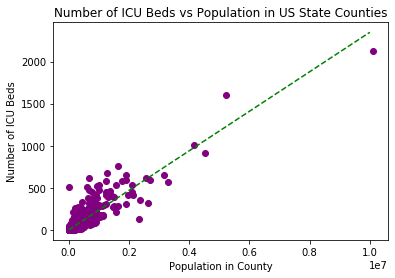

In [23]:
plt.scatter(x,y,c='purple')
bestfit = np.linspace(0., 10000000., 100)  
plt.plot(bestfit, model(bestfit, popt[0], popt[1]), 'g-', linestyle = 'dashed')

plt.title('Number of ICU Beds vs Population in US State Counties')
plt.xlabel('Population in County')
plt.ylabel('Number of ICU Beds')